# Semi-Supervised Learning: Tutorial

## 0. 모듈 불러오기

In [12]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' 모델 학습용 모듈 '''
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

## 1. 분석 데이터: Pistachio Dataset (이진 분류 문제)

### Task abstract : 피스타치오의 16가지 속성을 기반으로 피스타치오 종 분류

### 설명변수(X) : 피스타치오 속성

- AREA
- PERIMETER
- MAJOR_AXIS
- MINOR_AXIS
- ECCENTRICITY
- EQDIASQ
- SOLIDITY
- CONVEX_AREA
- EXTENT
- ASPECT_RATIO 
- ROUNDNESS
- COMPACTNESS
- SHAPEFACTOR_1
- SHAPEFACTOR_2
- SHAPEFACTOR_3
- SHAPEFACTOR_4

### 반응변수(Y) : 피스타치오 종

- Species : Kirmizi_Pistachio, Siit_Pistachio  

### 1-1 데이터 전처리 및 탐색적 데이터 분석

### 데이터 불러오기

In [13]:
data =  pd.read_csv('./Pistachio.csv', sep=",")

### 데이터 확인

In [14]:
print('Data shape: {}'.format(data.shape))
data.head()

Data shape: (2148, 17)


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [15]:
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000


### 클래스 비율 확인

In [16]:
data['Class'].value_counts()

Kirmizi_Pistachio    1232
Siit_Pistachio        916
Name: Class, dtype: int64

### 결측치 확인

In [17]:
data.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

### 1-2 학습 데이터(Training Dataset), 테스트 데이터(Testing Dataset) 정의

### 학습 데이터, 테스트 데이터 분리

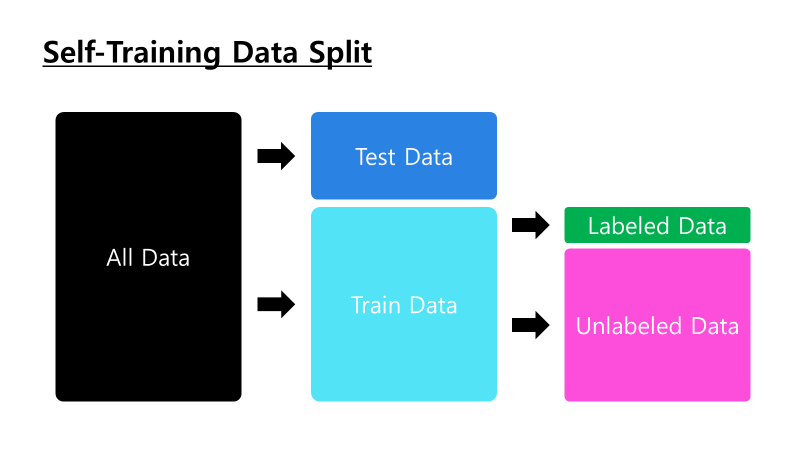

##### Train Data, Test Data Split
- test_size로 테스트 데이터의 비율 설정

In [18]:
df_train, df_test = train_test_split(data, test_size = 0.25, random_state =0)
print('Size of train dataframe: ', df_train.shape[0])
print('Size of test dataframe: ', df_test.shape[0])

Size of train dataframe:  1611
Size of test dataframe:  537


##### Train Data를 Labeled Data, Unlabeled Data로 Split 
- Random_Mask column을 추가
- Labeled Data => -1, Unlabeled Data => 1을 가지도록 설정
- frac으로 Labeled Data의 비율을 설정
- New_Target column을 추가
- Random_Mask => -1인 데이터들은 New_Target에 실제 Class value 할당
- Random_Mask => 1인 데이터들은 New_Target에 -1을 value로 할당

In [19]:
df_train['Random_Mask'] = True
df_train.loc[df_train.sample(frac=0.01, random_state = 0).index, 'Random_Mask'] = False
df_train['New_Target'] = df_train.apply(lambda x: x['Class'] if x['Random_Mask'] ==False else -1, axis = 1)
df_train['New_Target'].value_counts()

-1                   1595
Kirmizi_Pistachio      11
Siit_Pistachio          5
Name: New_Target, dtype: int64

## 2. Model Training, Testing

- Labeled Data만 사용해 학습한 Supervised Learning Model과 Unlabeled Data도 사용하여 학습한 Semi-Supervised Learning Model의 성능을 비교

### 학습에 사용한 Machine Learning Model - SVM(Support Vector Machine)
- Margin을 최대화 하는 방향으로 경계면을 최적화하는 기법 : 일반화 오차를 줄여 새로운 데이터를 잘 분류하도록 함
- Margin : Class를 구분하는 결정 경계(decision boundary)와 가장 가까운 훈련 샘플 사이의 거리를 의미
- 마진에 걸쳐있는 샘플들을 Suppor Vector라고 명칭

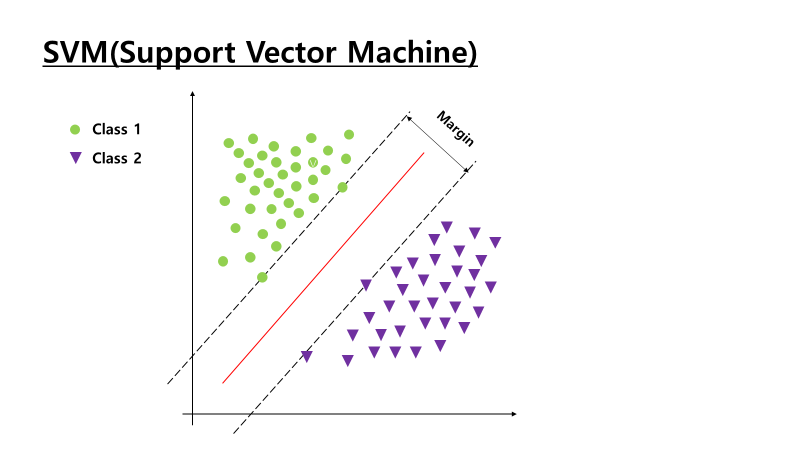

### 2-1. Baseline Model Training
- Labeled Data만 사용한 Supervised Learning Model 구축

##### Labeled Data 의  Train Data, Test Data 정의

In [20]:
df_train_labeled = df_train[df_train['New_Target']!=-1]

X_baseline = df_train_labeled.drop(['Class', 'Random_Mask', 'New_Target'], axis = 1)
y_baseline = df_train_labeled['New_Target'].values

X_test = df_test.drop(['Class'], axis = 1)
y_test = df_test['Class'].values

##### Baseline Model Training & Testing

##### Sklearn SVC Parameters
- kernel : 어떤 kernel trick을 활용할지 지정 ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed') 
- C, gamma : decision boundary 조절 역할 -> Margin을 크게하여 일반화 오차를 줄이는 것 vs 학습 데이터를 잘 분류하도록 하는 것

In [21]:
model =SVC(kernel='rbf', 
            probability=True, 
            C=1.0, # default = 1.0
            gamma='scale', # default = 'scale'
            random_state=0
           )


clf = model.fit(X_baseline, y_baseline)

print('---------- SVC Baseline Model - Evaluation on Test Data ----------')
accuracy_score_B = clf.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_B)
print(classification_report(y_test, clf.predict(X_test)))

---------- SVC Baseline Model - Evaluation on Test Data ----------
Accuracy Score:  0.5772811918063314
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.58      1.00      0.73       310
   Siit_Pistachio       0.00      0.00      0.00       227

         accuracy                           0.58       537
        macro avg       0.29      0.50      0.37       537
     weighted avg       0.33      0.58      0.42       537



### 2-2. Self-Training Model Training
- Unlabeled data, Labeled Data를 모두 활용해 Semi-Supervised Learining Model 구축

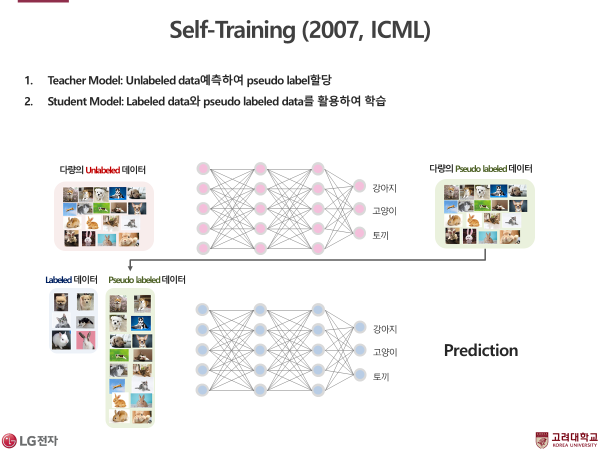

##### Self-Training Train Data, Test Data 정의

In [22]:
X_train = df_train.drop(['Class', 'Random_Mask', 'New_Target'], axis = 1)
y_train = df_train['New_Target'].values

##### Self-Training & Testing

##### Sklearn SelfTrainingClassifier Parameters

- base_estimator : fit, predict_probability를 구현하는 추정기, 학습에 사용하는 모델

- criterion : pseudo labeled 데이터 중 훈련 데이터에 추가할 데이터를 선택하는 기준 ('threshold' -> 예측 확률이 threshold 이상인 데이터들을 훈련 데이터에 추가, 'k-best' -> 예측 확률이 가장 높은 k개의 데이터를 훈련 데이터로 추가)

- threshold : criterion이 'threshold'일 경우 임계값 지정

- k-best : criterion이 'k-best'일 경우 k값 지정

- max-iter : pseudo labeling, training 최대 반복 횟수를 지정

In [23]:
model_svc = SVC(kernel='rbf', 
            probability=True, 
            C=1.0, # default = 1.0
            gamma='scale', # default = 'scale'
            random_state=0
           )

self_training_model = SelfTrainingClassifier(base_estimator = model_svc,
                                            threshold = 0.75,
                                            criterion = 'threshold',
                                            max_iter = 10,
                                            verbose = True
                                            )

clf_ST = self_training_model.fit(X_train, y_train)

print('')
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)

#print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
print(classification_report(y_test, clf_ST.predict(X_test)))

End of iteration 1, added 591 new labels.
End of iteration 2, added 723 new labels.
End of iteration 3, added 167 new labels.
End of iteration 4, added 42 new labels.
End of iteration 5, added 7 new labels.

---------- Self Training Model - Summary ----------
Base Estimator:  SVC(probability=True, random_state=0)
Classes:  ['Kirmizi_Pistachio' 'Siit_Pistachio']
Transduction Labels:  ['Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Siit_Pistachio' ...
 'Siit_Pistachio' 'Kirmizi_Pistachio' 'Siit_Pistachio']
Number of Features:  16
Number of Iterations:  6
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.7486033519553073
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.70      0.97      0.82       310
   Siit_Pistachio       0.92      0.44      0.60       227

         accuracy                           0.75       537
        macro avg       0.81      0.71      0.71       537
     weight